# Analyzing Book Reviews at Different Scales

Online book reviews are an abundant source of information on how readers discuss and appreciate books. Reviews often mention the reading experience and how the reader was affected by the book.

To study the reception of fiction, one can study professional reviews in newspapers and magazines, but also the millions of online reviews on social platforms like GoodReads and LibraryThing, or book sellers like Amazon. 

The methods that are relevant and appropriate for studying book reviews depends on the number of reviews as well as the selection criteria, such as the source of reviews, and their diversity.

- **Number**: large numbers of reviews provide different kinds of information than small numbers of reviews.

    - 1: For a single or a handful or reviews, close reading is probably the most effective and flexible method. One can read each review in detail, multiple times and make comparisons and connections between the reviews. 

    - 100: For a few hundreds reviews, close reading them is still doable, but time consuming, and comparing them becomes more difficult with keeping carefully organised notes. Some ways of sorting, grouping and text transforming could also be useful. E.g. ordering the reviews by date or grouping them by book genre or gender of the reviewer. Making frequency lists of words and phrases can give some insight in common themes.

    - 10,000: For tens of thousands of reviews, close reading is no longer an option. Some way of algorithmically extracting information from them seems necessary. Text normalisation (collapsing differences in capitalization and morphological variation) will make it easier to identify connections between reviews and between groups of words and phrases. 

    - 1,000,000: For millions of reviews, there is so much textual data, that small variations in words and phrases become meaningful. 

- **Source**: First of all the source and type: are all reviews from a single source or from many different sources? On social platforms that allow users to post reviews, readers tend to focus on the book and their reading of it. On book seller websites, reviewers may also include the buying process and the shipping and handling. On personal blogs, reviewers may discuss the book in a wider context, or even review multiple books at the same time. Finally, different platforms allow different ways of writing the review. Some only allow reviewers to use plain text (e.g. Amazon), while others allow emojis and the incorporation of multimedia (e.g. images and videos), which requires different ways of analyzing.

- **Diversity**: Second, 

    - *reviewed books*: assuming each review focuses on a single book, the set of reviews may all be about the same book (to study the reception of a single work), or a small set of books (by a specific (set of) author(s) or in a certain (set of) genre(s)), or a huge set of different books to study the entire domain of online book reviews. In the latter two cases, a further issue is how many reviews there are for each book. 

    - *review length*: Another 

    - *reviewers*: are there multiple reviews by the same reviewer? Or all from different reviewers? Some platforms include a reputation system, which allows one to select only reviews from e.g. frequent reviewers, reviewers with some form of recognition, or newcomers.

    - *review period*: are the reviews written over a long or short period? If they cover multiple books, the reviews for very recent books will maybe be written by reviewers who received an advance copy, or by fans who bought the book as soon as they can, while for older books, the reviews can cover a longer period, and include reviewers who only read the book after hearing about it from others, or by reviewers reading it in different time periods with different social norms (e.g. reviews from the mid 1990s vs. reviews from 2020).


In this notebook, we will look at book reviews from Amazon and Goodreads, at different scales and with different levels of diversity, and discuss how scale affects which methods and techniques are feasible and useful, and how different patterns emerge and different kinds of information are revealed.

In [1]:
%reload_ext autoreload
%autoreload 2


In [549]:
from typing import Dict, List
from elasticsearch import Elasticsearch
import spacy
from collections import Counter
import random
import matplotlib.pyplot as plt
from IPython.display import Image


In [2]:
# Gone Girl reviews
review_file = 'reviews/reviews_Gone_Girl.csv'

import pandas as pd

df = pd.read_csv(review_file, sep='\t')

print('Number of reviews:', df.shape[0])

Number of reviews: 19867


There are almost 20,000 reviews for the book Gone Girl. Reading them all would not only take a lot of time, but through close reading we would also miss or not notice patterns at different scales. 

We will start with looking at a small number of long reviews, and methods of analysing them.

In [3]:
# long reviews have over 5000 characters. 
# With an average word length of 4 and one whitespace,
# 5000 characters correspond to roughly 1000 words.

print('Number of long reviews (>5000 characters):', df[df.review_text.map(len) > 5000].shape[0])


Number of long reviews (>5000 characters): 12


In [4]:
long_reviews = list(df[df.review_text.map(len) > 5000].review_text)
long_reviews[0]


'*Note: No outright spoilers but there are vague references to the book\'s outcome that could be deciphered. My suggestion if you want to be completely surprised, read this review after finishing the book.Thank God it happened! My faith in the common novel has finally been restored after reading a string of bad to mediocre disappointments. Gillian Flynn has written a novel that kept me engaged and on the edge of my seat. I literally devoured this book in a few sittings. Gone Girl is definitely hype worthy.Nick Dunne wakes up on his 5-year anniversary to his beautiful wife Amy making him a celebratory breakfast. Soon after, Amy goes missing. As the clues are racked up, the world is left to wonder, did Nick kill his wife and if so, why? The motives for murder are introduced rapidly. It\'s apparent that Nick had plenty of reasons to want Amy dead. Still, with no recovered body, it is impossible to know one hundred percent. As sympathy for Nick with the media as well as those closest to hi

## Close reading and Keywords in context

Close reading this longer review above and the 11 others does not take much time and gives a good idea of what aspects of the book they highlight.

It is also easy to zoom on specific keywords used in the reviews using Key Word In Context (KWIC), which shows all occurrences of a specific (set of) keyword(s) and the surrounding text, to give a quick overview of the context in which those keywords are used.

As an example, below are listed all occurrences of the keywords `writing`, `writes` and `written` in the 12 long reviews, with a fixed amount of text before and after the keyword:


In [5]:
import re

def kwic(pattern, reviews):
    for review in reviews:
        for match in re.findall(pattern, review):
            print(f'{match[1]: <15}{match[0]}')
            
kwic(r'(.{40}(writing|writes|written).{40})', long_reviews)

written        ocre disappointments. Gillian Flynn has written a novel that kept me engaged and on the
writing        Amy and Nick have lost their trendy NYC writing jobs. Amy, who had a substantial trust 
writing        led through a hidden diary she has been writing for several years, the story paces quic
writing        extreme to the next is a marvel.Flynn's writing is finely honed and her prose is a joy 
written        orked so well within the context it was written and what I loved most is that any trite
writing        s is what I loved so much about Flynn's writing, the ability to create the right tone t
writing        us things.)To round things out, Flynn's writing was excellent.  Again, works by Dan Bro
writing        ks made me realize that popular novel's writing only had to be at about a 4th grade rea
writing        wing.*I liked  Ms. Flynn's in your face writing style.  It is dark, wicked, blatant and
writing        e is nothing graphic or disturbing, the writing style is a

Doing this for all 19,867 reviews would result in a very long list of contexts, that would be hard to summarise and analyse.

In [6]:
keyword_count = df.review_text.str.count('writing|writes|written').sum()
print('Number of occurrences of writing, writes and written:', keyword_count)

Number of occurrences of writing, writes and written: 4807


Another method of analyzing reviews is counting frequencies of words or more precisely, terms. We use term here to mean unit of analysis. In this case the unit of analysis is a word, but a term can also be a combinations of words, a punctuation symbol, an emoji, or a whole sentence or any other aspects of the text.

This immediately prompts a few questions related to Data Scopes:

- How are words in reviews going to be **modelled**? I.e. what 'counts' as a word?
- What is lost if we transform a review text into a list of words?

We use the [spacy.io](https://spacy.io) library to transform reviews texts into word lists. Spacy is a high-performance Natural Language Processing library, that can use language-specific models for identifying words, their part-of-speech and lemma, as well as many other aspects. 

So, the answer to the first question is buried deep inside the Spacy library and partly depends on the language-specific model that we use. For now, we use a lightweight English language model based on World Wide Web text documents: the *small* `en_core_web_sm` model (there are also medium and large models which are trained on larger sets of manually annotated documents).

In [7]:
# Import the spacy library
# See https://spacy.io/usage for installation instructions
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

# iterate over the list of reviews and feed each to Spacy's nlp module
docs = [nlp(review) for review in long_reviews]

Spacy models texts as [Document](https://spacy.io/api/doc)s, which contains lists of tokens and sentences, with tokens roughly corresponding to words, including punctuation and other characters.

Each Spacy [token](https://spacy.io/api/token) contains a wealth of information, including the surface form (the orthographic spelling), the word lemma, its part-of-speech, whether is a stopword or punctuation or whitespace, etc. 

We are going to count each token in each document in two ways:

1. term frequency (TF): the total frequency of each token or word in all texts combined. If the word `book` occurs twice in document A and once in document B, its term frequency is $2+1=3$.
2. document frequency (DF): the total number of documents (reviews) that contain a word. The word `book` occurs in both A and B, therefore its document frequency is $1+1=2$.

The document frequency is a useful alternative to overall term counts for getting an idea of how common a term is, because it is more robust against outliers. If the word `book` occurs in 50 out of 100 reviews, it is a common word, which is not unexpected in a set of book reviews. But there might be one very long review that compares the book to the movie adaptation, and mentions the word `movie` 60 times. The term frequency of `movie` might be high compared to the term frequency of `book`, but the document frequencies make clear that `movie` is not a common word in this data set. 

In [8]:
from collections import Counter

# Initialize the term frequency and document frequency counters
term_freq = Counter()
doc_freq = Counter()

# Iterate over all selected reviews
for doc in docs:
    # Each word occurrence is a token
    tokens = [token.text for token in doc]
    # Types is the list of words used, with each word counted only once
    types = list(set(tokens))
    # update the counters with the tokens and types of each review
    term_freq.update(tokens)
    doc_freq.update(types)

# Show the top 50 most frequent terms, as well as their document frequencies
print('\nterm\t\t\tTF\tDF')
print('-'*40)
for term, freq in term_freq.most_common(50):
    print(f'{term: <24}{freq: <8}{doc_freq[term]}')


term			TF	DF
----------------------------------------
,                       721     12
the                     689     12
.                       578     12
and                     415     12
to                      388     12
of                      366     12
a                       342     12
is                      258     12
                        197     4
in                      194     12
-                       178     11
that                    172     12
it                      156     12
I                       133     11
her                     132     12
Nick                    125     11
Amy                     123     11
as                      114     12
's                      110     10
she                     108     11
for                     106     12
you                     102     11
with                    99      12
his                     95      11
on                      86      12
"                       84      6
this                    78      12
wa

The first thing we notice is that the list is dominated by stopwords and punctuation, that is typical of any text, so doesn't give a good insight in what are frequent worsd in **reviews of Gone Girl**. 

Some **selection** and **normalisation** is needed. Filtering out stop words and punctuation gives a more insightful list:

In [9]:
# Initialize the term frequency and document frequency counters
term_freq = Counter()
doc_freq = Counter()

# Iterate over all selected reviews
for doc in docs:
    # Each word occurrence is a token, but only if it's not a stopword or punctuation
    tokens = [token.text for token in doc if token.is_alpha and not token.is_stop]
    # Types is the list of words used, with each word counted only once
    types = list(set(tokens))
    # update the counters with the tokens and types of each review
    term_freq.update(tokens)
    doc_freq.update(types)

print('Total number of words:', sum(term_freq.values()))


# Show the top 50 most frequent terms, as well as their document frequencies
print('\nterm\t\t\tTF\tDF')
print('-'*40)
for term, freq in term_freq.most_common(50):
    print(f'{term: <24}{freq: <8}{doc_freq[term]}')

Total number of words: 6268

term			TF	DF
----------------------------------------
Nick                    125     11
Amy                     123     11
book                    75      11
Flynn                   55      11
like                    47      11
read                    44      10
characters              43      10
marriage                29      9
novel                   28      10
story                   26      8
way                     26      11
life                    25      9
wife                    24      10
know                    24      9
time                    24      10
plot                    24      7
Girl                    22      8
good                    21      6
reading                 20      8
parents                 19      7
Gone                    18      6
think                   18      9
police                  18      7
murder                  17      9
people                  17      6
end                     16      8
find                  

We see that `Nick` is the most frequent content word, and is mentioned in 11 out of 12 reviews. This might be the name of the author or of a character in the book. We also see some words that are typical of the book review domain, like `read`, `characters`, `story`, `plot` and `writing`, with 10 out 12 reviews mentioning `characters` and 7 mentioning `plot`. This might suggest that readers find the characters in the book more noteworthy than the plot.

Of course, these 12 reviews are not representative of all readers of the books, not even of all 19,867 reviewers. Although the frequency lists are insightful, and especially the document frequency list gives a indication of how many reviewers mention certain aspects, this set of long reviews is too small in number to get meaningful insights on relative noteworthiness of book aspects.

If we go up one order of magnitude and look at more than one hundred reviews, we already get a more stable picture of what is commonly mentioned and what not:


In [10]:
# Reviews of 2500 characters are probably around 500 words

print('Number of reviews with over 2500 characters:')
df[df.review_text.map(len) > 2500].shape[0]

Number of reviews with over 2500 characters:


163

In [11]:
# make a list of the review texts of all reviews with more than 2500 characters
reviews = list(df[df.review_text.map(len) > 2500].review_text)
# run Spacy on the review texts
spacy_docs = [nlp(review) for review in reviews]

# Initialize the term frequency and document frequency counters
term_freq = Counter()
doc_freq = Counter()

# Iterate over all selected reviews
for spacy_doc in spacy_docs:
    # Each word occurrence is a token, but only if it's not a stopword or punctuation
    tokens = [token.text for token in spacy_doc if token.is_alpha and not token.is_stop]
    # Types is the list of words used, with each word counted only once
    types = list(set(tokens))
    # update the counters with the tokens and types of each review
    term_freq.update(tokens)
    doc_freq.update(types)
    
print('Total number of words:', sum(term_freq.values()))

# Show the top 50 most frequent terms, as well as their document frequencies
print('\nterm\t\t\tTF\tDF\tFraction')
print('-'*48)
for term, freq in term_freq.most_common(50):
    fraction = doc_freq[term] / len(reviews)
    print(f'{term: <24}{freq: <8}{doc_freq[term]: <8}{fraction: <.2f}')


Total number of words: 44011

term			TF	DF	Fraction
------------------------------------------------
Amy                     908     140     0.86
Nick                    852     136     0.83
book                    801     153     0.94
Flynn                   422     126     0.77
story                   399     122     0.75
like                    363     131     0.80
read                    360     126     0.77
characters              310     120     0.74
Girl                    266     100     0.61
novel                   242     93      0.57
Gone                    240     93      0.57
know                    213     101     0.62
ending                  210     94      0.58
way                     200     112     0.69
time                    197     113     0.69
people                  192     92      0.56
reading                 190     93      0.57
think                   185     95      0.58
plot                    182     89      0.55
marriage                177     81      0.50

Now we see that still 122 out 163 reviews (75%) mention `story` and 120 reviews (74%) mention `characters`, with `plot` mentioned in 89 reviews (55%).

Notice also that `ending` and `end` are mentioned often (in 94 reviews and 92 respectively), suggesting that the ending of the book is a salient aspect for reviewers. 

Individual words and their frequencies give only so much information. With many documents, it is also insightful to look at combinations of words, such as word n-grams (collocations) or co-occurrences. 

In [13]:
# make_content_ngrams is a function in review.py that
# create ngrams for a spacy document
from review import make_content_ngrams

#spacy_docs = [nlp(review) for review in reviews]

term_freq = Counter()
doc_freq = Counter()

for spacy_doc in spacy_docs:
    bigrams = make_content_ngrams(spacy_doc, ngram_size=2, use_lemma=False)
    types = list(set(bigrams))
    term_freq.update(bigrams)
    doc_freq.update(set(bigrams))

print('\nbigram term\t\t\t\tTF\tDF\tFraction')
print('-'*64)
for bigram, freq in doc_freq.most_common(25):
    fraction = doc_freq[bigram] / len(reviews)
    print(f'{bigram: <40}{term_freq[bigram]: <8}{doc_freq[bigram]: <8}{fraction: <.2}')
    


bigram term				TF	DF	Fraction
----------------------------------------------------------------
gone girl                               278     105     0.64
gillian flynn                           153     101     0.62
new york                                61      48      0.29
amazing amy                             45      38      0.23
nick dunne                              43      36      0.22
wedding anniversary                     35      34      0.21
diary entries                           41      32      0.2
main characters                         34      29      0.18
fifth wedding                           27      27      0.17
twin sister                             28      26      0.16
goes missing                            29      26      0.16
amy disappears                          22      22      0.13
fifth anniversary                       22      22      0.13
amy dunne                               22      21      0.13
trust fund                              21      19 

This list of top 25 most common word bigrams shows that there are certain aspects of the plot that are commonly mentioned in reviews (`wedding anniversary`, `amy disappears`, `amy goes`, `goes missing`). But the document frequencies are much lower than for the individual words.

Doing the same for the 12 long reviews:


In [14]:
long_docs = [nlp(review) for review in long_reviews]

term_freq = Counter()
doc_freq = Counter()

for spacy_doc in long_docs:
    bigrams = make_content_ngrams(spacy_doc, ngram_size=2, use_lemma=False)
    types = list(set(bigrams))
    term_freq.update(bigrams)
    doc_freq.update(set(bigrams))

print('\nbigram term\t\t\t\tTF\tDF\tFraction')
print('-'*64)
for bigram, freq in term_freq.most_common(25):
    fraction = doc_freq[bigram] / len(long_reviews)
    print(f'{bigram: <40}{freq: <8}{doc_freq[bigram]: <8}{fraction: <.2}')
    


bigram term				TF	DF	Fraction
----------------------------------------------------------------
gone girl                               30      8       0.67
gillian flynn                           9       8       0.67
nick dunne                              6       5       0.42
amazing amy                             4       4       0.33
like nick                               4       3       0.25
psychological growth                    4       1       0.083
tanner bolt                             4       2       0.17
amy goes                                3       3       0.25
summer read                             3       3       0.25
amy elliott                             3       3       0.25
new york                                3       3       0.25
psychological thriller                  3       3       0.25
second half                             3       1       0.083
trust fund                              3       3       0.25
public opinion                          3       

In [15]:
from review import get_ngram_cooccurrence

bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

gillian flynn                           gone girl                               66      
gillian flynn                           new york                                31      
gone girl                               new york                                30      
go girl                                 gone girl                               30      
gillian flynn                           go girl                                 28      
gillian flynn                           nick dunne                              28      
fifth wedding                           wedding anniversary                     27      
amazing amy                             gillian flynn                           26      
go missing                              gone girl                               24      
gone girl                               wedding anniversary                     23      
diary entry                             gillian flynn                           23      
diary entry          

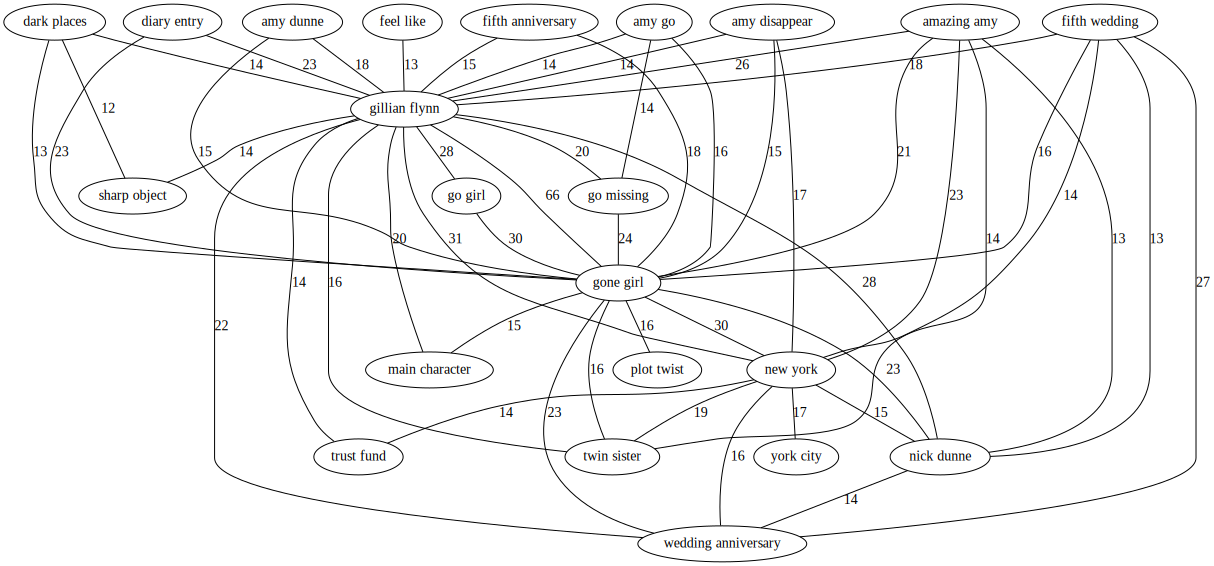

In [18]:

from review import draw_cooccurrence_graph

draw_cooccurrence_graph(bigram_cooc)

The most central terms are `gone girl` and `gillian flynn`, i.e. the title and author of the book. Other somewhat central terms are `new york`, `amazing amy`, `nick dunne`, `fifth anniversary` and `wedding anniversary`. 

It is not surprising that title and author are commonly mentioned, but therefore also not very interesting. It might be more insightful to remove those and see how the remaining terms are related to each other.

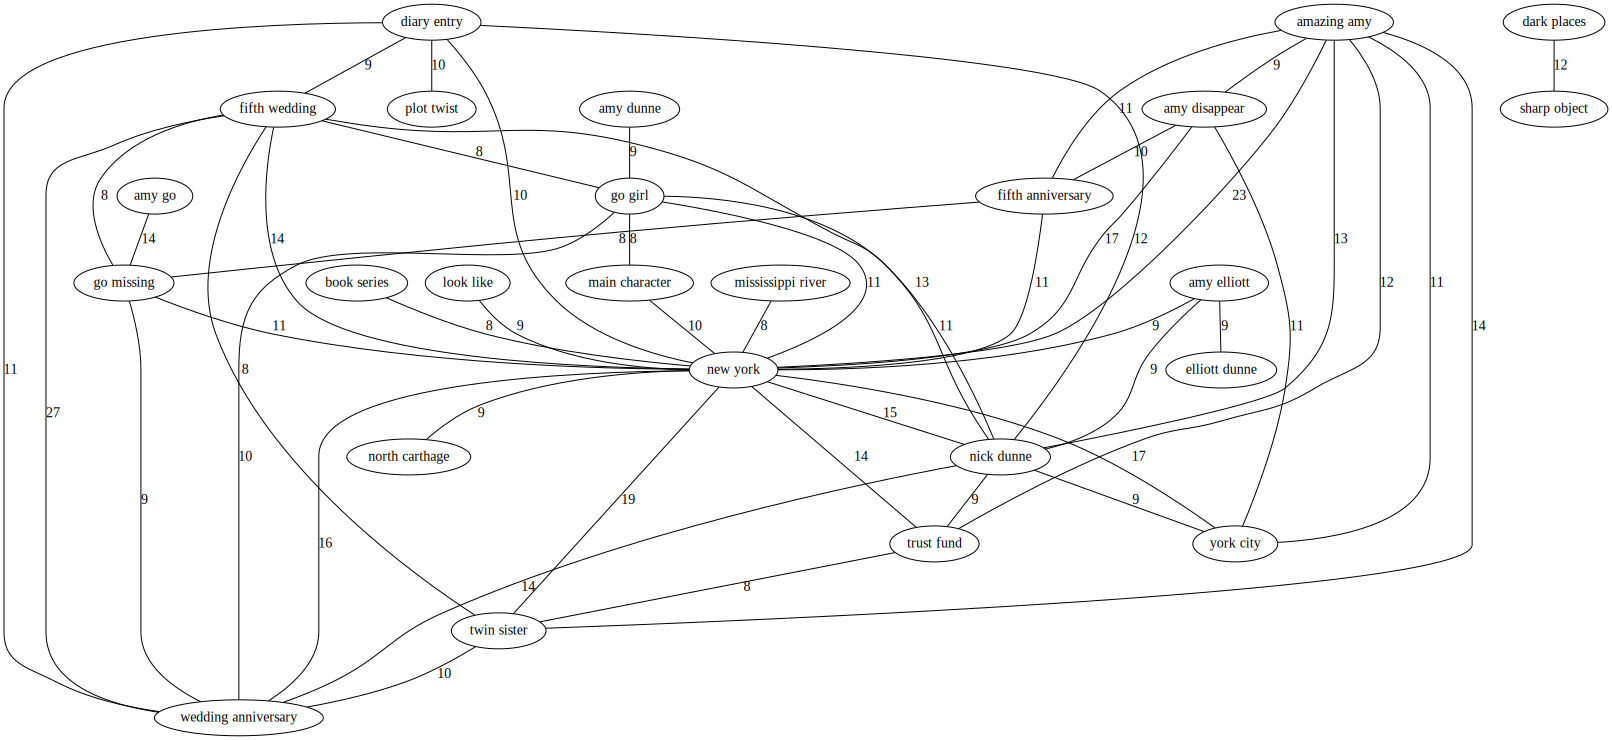

In [22]:
from review import get_cooccurrence

ignore_list = ['gone girl', 'gillian flynn']

bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True, ignore_list=ignore_list)

draw_cooccurrence_graph(bigram_cooc)

Now `new york` is the central term, but more plot-related terms come to the surface: `plot twist`, `diary entry`, `go missing`, `trust fund`, `mississippi river`. 

This gives a quick insight, but most of this would have been easy to get from close reading a sample of the reviews. The main gain of this approach is that we see more explicitly which aspects of the plot are often co-mentioned.

Can we get a clearer picture of the structure of Gone Girl review aspects by looking at all 19,867 reviews?

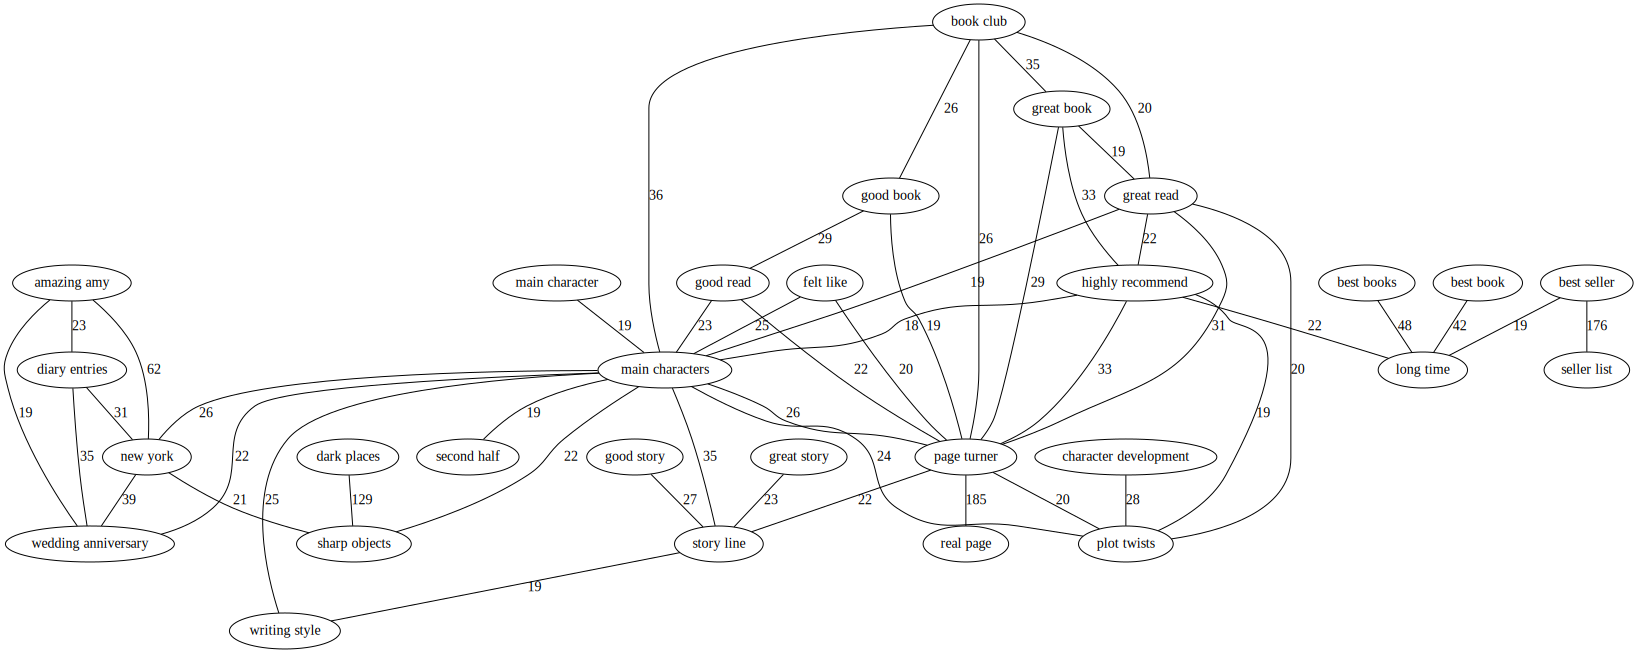

In [24]:
# These files are preprocessed lists of the word and lemma bi-grams in all reviews of Gone Girl
lemma_file = 'reviews/reviews_Gone_Girl.ngrams.lemma.csv'
word_file = 'reviews/reviews_Gone_Girl.ngrams.word.csv'

bigram_sets = []

with open(word_file, 'rt') as fh:
    for line in fh:
        bigram_set = line.strip().split('\t')
        bigram_sets.append(bigram_set)

bigram_freq = Counter([bigram for bigram_set in bigram_sets for bigram in bigram_set])
ignore_list = ['gone girl', 'gillian flynn']
common_bigrams = [bigram for bigram, _freq in bigram_freq.most_common(50) if bigram not in ignore_list]

bigram_cooc = get_cooccurrence(bigram_sets, common_bigrams)

draw_cooccurrence_graph(bigram_cooc)


We now get a lot more aspects of book reviews:

- story aspects such as `story line`, `second half` and `page turner`
- characters aspects: `main characters`, `character development`
- recommendation aspects: `great book`, `highly recommended`, `great read`
- popularity aspects: `best books`, `best seller`

What is interesting here is that `story line` is connected to `writing style` and `main characters` and `character development` are mentioned together with `plot twists`.

However, we also see some morphological variants:

- `main character` and `main characters`
- `best book` and `best books`

We can do a further **normalisation** step and make bigram terms using the lemmas instead of the surface words, to collapse this variation.

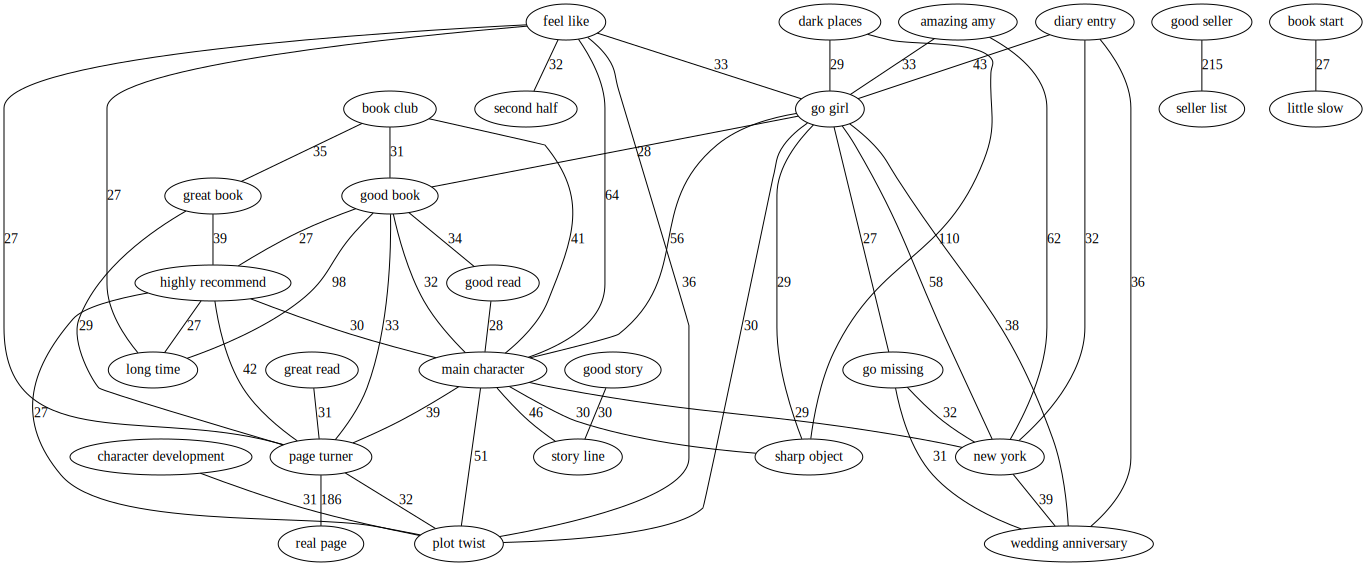

In [496]:
# Word and lemma bi-grams in reviews of Gone Girl
lemma_file = 'reviews/reviews_Gone_Girl.ngrams.lemma.csv'
word_file = 'reviews/reviews_Gone_Girl.ngrams.word.csv'

bigram_sets = []

with open(lemma_file, 'rt') as fh:
    for line in fh:
        bigram_set = line.strip().split('\t')
        bigram_sets.append(bigram_set)

bigram_freq = Counter([bigram for bigram_set in bigram_sets for bigram in bigram_set])
ignore_list = ['gone girl', 'gillian flynn']
common_bigrams = [bigram for bigram, _freq in bigram_freq.most_common(50) if bigram not in ignore_list]

bigram_cooc = get_cooccurrence(bigram_sets, common_bigrams)

draw_cooccurrence_graph(bigram_cooc)


With the variation collapsed, the difference is small. 

However, at this stage and with data at this scale, this method could be useful to compare positive and negative reviews. 

## Analysing Reviews of Multiple Books

So far, we have looked at reviews for a single book, which put focus on the specific plot and characters of the book. If we zoom out to include reviews of other books, we would expect book-specific details to disappear to the background.

In [497]:
review_file = 'reviews/reviews.Books.100-items.1000-reviews.100-characters.csv'

df = pd.read_csv(review_file, sep='\t', dtype={'review_text': str})
df['review_length'] = df['review_text'].apply(len)
df_long = df[df.review_length > 1000]



In [498]:
# select 1 review per book
reviews = list(df_long.groupby('asin').head(1).review_text)
print('Number of reviews:', len(reviews))

# run Spacy on the reviews
spacy_docs = [nlp(review) for review in reviews]


Number of reviews: 100


In [499]:

bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

major character                         minor character                         2       
feel like                               good book                               2       
great deal                              long time                               2       
entire book                             entirely different                      2       
entire book                             feel like                               2       
entirely different                      feel like                               2       
feel like                               main character                          2       
look forward                            personal life                           2       
little bit                              main character                          1       
little bit                              people look                             1       
main character                          people look                             1       
long ago             

With only a single review per book for 100 books, the most frequently co-occurring bigram pairs no longer refer to the topical content of specific books, but to common elements, such as `major character`, `minor character` and `good book`, as well as experiences such as `feel like` and `thoroughly enjoy`.

In [501]:
# select 1 review per book
reviews = list(df_long.groupby('asin').head(10).review_text)
print('Number of reviews:', len(reviews))

# run Spacy on the reviews
spacy_docs = [nlp(review) for review in reviews]
# compute cooccurrence of bigram pairs
bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

Number of reviews: 1000
war ii                                  world war                               15      
feel like                               main character                          15      
joe hill                                stephen king                            9       
feel like                               writing style                           8       
feel like                               good book                               7       
main character                          year old                                7       
feel like                               good friend                             6       
feel like                               love story                              6       
main character                          take place                              6       
feel like                               love triangle                           6       
feel like                               look forward                            5     

The problem is that author and content informataion of individual books still comes bubbling up to the top of the frequency lists. To change the focus to the general book aspects, the number of different books needs to be high and the number of reviews per book should be low with respect to the number of different books. 

In [26]:
review_file = 'reviews/reviews.Books.10000-items.10-reviews.100-characters.csv'

df = pd.read_csv(review_file, sep='\t', dtype={'review_text': str})
df['review_length'] = df['review_text'].apply(len)
df_long = df[df.review_length > 1000]


In [27]:
# select 1 review per book
reviews = list(df_long.groupby('asin').head(1).review_text)
print('Number of reviews:', len(reviews))

# run Spacy on the reviews
spacy_docs = [nlp(review) for review in reviews]
# compute cooccurrence of bigram pairs
bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

Number of reviews: 8399
new york                                york city                               94      
feel like                               main character                          47      
feel like                               year old                                34      
harriet klausner                        story line                              32      
feel like                               new york                                30      
good friend                             main character                          29      
new york                                year ago                                27      
main character                          year old                                26      
good book                               highly recommend                        26      
feel like                               highly recommend                        26      
look forward                            main character                          24    

In [391]:
reviews = list(df.review_text)
for ri, review in enumerate(reviews):
    if not isinstance(review, str):
        print(ri, type(review))


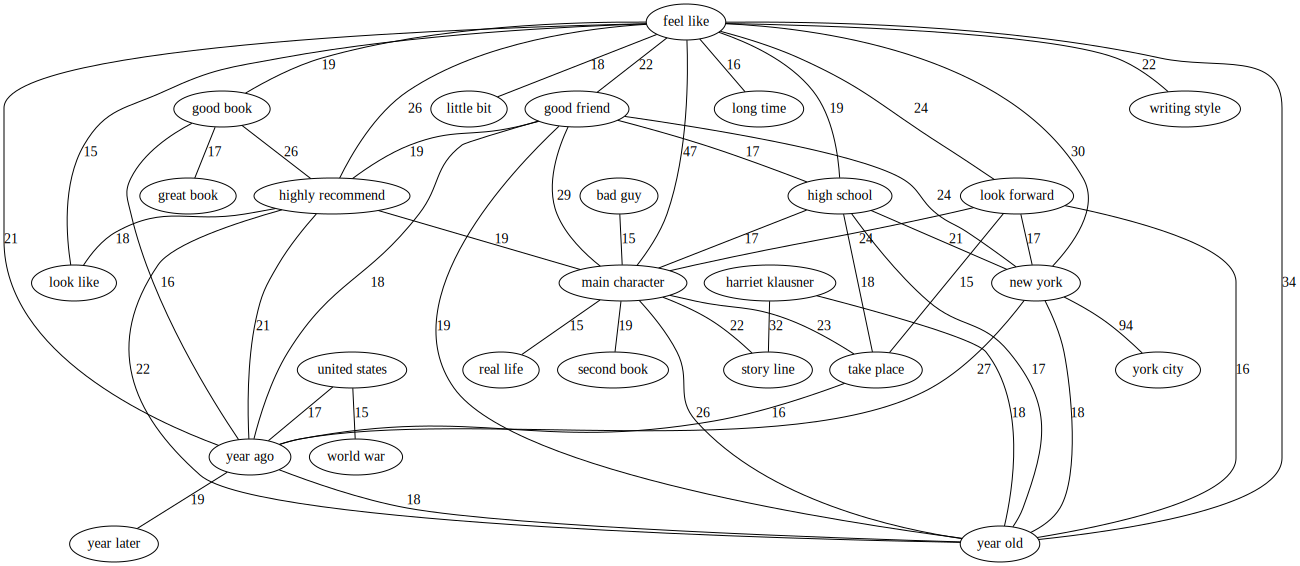

In [505]:
draw_cooccurrence_graph(bigram_cooc)

In [506]:
bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True, num_ngrams=100)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

new york                                york city                               94      
war ii                                  world war                               74      
armchair interviews                     interviews say                          61      
feel like                               main character                          47      
feel like                               year old                                34      
harriet klausner                        story line                              32      
feel like                               new york                                30      
good friend                             main character                          29      
new york                                year ago                                27      
main character                          year old                                26      
good book                               highly recommend                        26      
feel like            

The bigrams `new york` and `york city` are common in reviews. A quick check shows they often refer the setting of the book, although `new york` also regularly refers to the New York Times newspaper:

In [25]:
!cat reviews/reviews.Books.10000-items.10-reviews.100-characters.csv | grep -o -E "\w+ New York \w+" | sort | uniq -c | sort -g -r | head -n 20

 166 in New York City
 101 the New York Times
  57 of New York City
  41 The New York Times
  34 in New York and
  32 to New York City
  18 to New York and
  18 the New York City
  17 the New York Yankees
  17 a New York Times
  15 to New York to
  11 from New York City
   9 in New York in
   8 the New York of
   8 from New York to
   8 and New York City
   8 a New York City
   7 in New York with
   6 the New York Post
   6 the New York Daily


Other surprising bigrams:

- `harriet klausner`
- `armchair interviews`

A quick scan of the occurrences of `Harriet Klausner` and `Armchair Interviews` reveals that these are the names used by two prolific reviewers.

In [54]:
df[df.review_text.str.contains('Harriet Klausner')].reviewer_id.value_counts()

AFVQZQ8PW0L       633
AVFEPPLJ4J1YG       1
A20X9S64ANWGE9      1
A314ATEXAXIMYD      1
A3JABMH98Y608D      1
A1YIWR7CCHAE2Z      1
Name: reviewer_id, dtype: int64

There are six reviewer accounts that mention `Harriet Klausner`, with one of them contributing 633 reviews containing that term.

In [49]:
hk_reviews = list(df[df.reviewer_id == 'AFVQZQ8PW0L'].review_text)

# Look at the last 50 characters of the first 30 reviews
for review in hk_reviews[:30]:
    print(review[-50:])

dow clearly for the S&amp;S crowd.Harriet Klausner
will ask what's it all about Tony?Harriet Klausner
rld according to Mimi Smartypants.Harriet Klausner
he mechanism WWI was never fought.Harriet Klausner
 aged rapidly after her beheading.Harriet Klausner
es a powerful "Never Forget" tale.Harriet Klausner
 has written a great epic fantasy.Harriet Klausner
e lose so they turn to antiheroes.Harriet Klausner
nd long enough to learn the truth.Harriet Klausner
Victoria Alexander's latest novel.Harriet Klausner
 a pleasant time for the audience.Harriet Klausner
something that readers will value.Harriet Klausner
dieval romance for sub-genre fans.Harriet Klausner
r look at the modern world of art.Harriet Klausner
nly to a climatic sting operation.Harriet Klausner
ry lovers to listen to the melody.Harriet Klausner
th a big cerebral puzzle to solve.Harriet Klausner
he latest DEATH ON DEMAND mystery.Harriet Klausner
es help eliminate stress inducers.Harriet Klausner
thought that was a perfect endi

In [57]:
# Prolific reviewer Harriet Klausner
print('Number of reviews by Harriet Klausner account:')
df[df.reviewer_id == 'AFVQZQ8PW0L'].shape[0]

Number of reviews by Harriet Klausner account:


645

So there are some reviews by this same account that are not signed `Harriet Klausner`.

If we look at the length of the reviews, they are fairly consistent in length, ranging between 1000 and 2000 characters, with the bulk around 1500 characters:

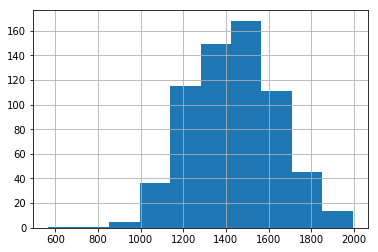

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

# Prolific reviewer Harriet Klausner
df[df.reviewer_id == 'AFVQZQ8PW0L'].review_length.hist()

In [37]:
# Prolific reviewer Harriet Klausner
df[df.reviewer_id == 'AFVQZQ8PW0L'].tail(5)

,asin,reviewer_id,review_time,rating,helpful_votes,total_votes,summary,review_text,review_length
99093,0062023047,AFVQZQ8PW0L,1311984000,5.0,0,0,delightful Regency romantic romp,"In 1820 Yorkshire, the man with the gun inform...",1191
99561,0062025791,AFVQZQ8PW0L,1346112000,5.0,2,2,delightful historical romantic suspense,"During the war, Madeline Valdan worked for the...",1308
99570,0062025805,AFVQZQ8PW0L,1327968000,5.0,0,1,engaging refreshing Regency romantic suspense,"In 1815 following Waterloo, British Major Benn...",1385
99801,006202728X,AFVQZQ8PW0L,1360800000,4.0,1,1,warm drama,"In 2010 in Walnut Ridge, Missouri, single mom ...",1145
99853,0062027808,AFVQZQ8PW0L,1359417600,4.0,1,1,engaging Victorian fairy tale romance,"In 1862 London, Catriona Cameron panics when s...",1476


Another noticable thing is that the review often start with a description of the setting (`In 1820 Yorkshire`, `During the war`, `In 1815 following Waterloo`, `In 2010 in Walnut Ridge, Missouri`, `In 1862 London`). 

It seems this reviewer has a consistent format and style of writing reviews. This is one of the typical **emergent** patterns in large datasets with contributions from many different people: the amount they contribute tends to be heavily skewed, with the majority of people contributing a small amount of data, and only a handful contributing huge amounts. This results in a so-called power-law distribution of data contributions that has the famous long-tail of heavy contributors. The tail is long because &mdash; graphing the contributed amount on the X-axis and the number of people who contribute that much on the Y-axis &mdash; they all contribute different amounts, creating a long flat tail to the right.



For `Armchair Interviews` there is only a single reviewer account.

In [56]:
df[df.review_text.str.contains('Armchair Interviews')].reviewer_id.value_counts()

A21NVBFIEQWDSG    117
Name: reviewer_id, dtype: int64

In [31]:
# Prolific reviewer Armchair Interviews
df[df.reviewer_id == 'A21NVBFIEQWDSG']

,asin,reviewer_id,review_time,rating,helpful_votes,total_votes,summary,review_text,review_length
2534,0007140975,A21NVBFIEQWDSG,1126137600,4.0,9,9,A must read!,If you get your news from the talking (and cut...,1684
2546,0007141785,A21NVBFIEQWDSG,1129334400,4.0,5,6,A grand read!,The Hungry Tide is a story of reconnecting and...,1401
3262,0007193181,A21NVBFIEQWDSG,1188950400,5.0,0,2,A real great hold-your-breath read!,Bloodshot is the third mystery in Stuart MacBr...,2019
3732,0007233450,A21NVBFIEQWDSG,1222387200,3.0,19,20,Much less than I hoped for,This is a somewhat unusual book. Nobel Prize w...,2369
3873,000724794X,A21NVBFIEQWDSG,1180915200,4.0,19,22,A good story kid will eat up,Henry loves books. But not like other children...,1189
5352,0007419457,A21NVBFIEQWDSG,1157500800,4.0,2,4,Non-stop suspense,Detective Sargeant Logan MacRae has been assig...,1286
21949,0060504196,A21NVBFIEQWDSG,1152144000,4.0,1,2,A good read!,Genealogist Carolina (Carly) May has been hire...,2275
22386,0060506725,A21NVBFIEQWDSG,1134432000,4.0,5,5,Delves into the real evil in our world!,There is no doubt that Laura Lippman has her f...,1379
23504,0060515120,A21NVBFIEQWDSG,1211414400,4.0,4,5,A stunning read,I've devoured every one of the 13 books publis...,1773
25330,0060529490,A21NVBFIEQWDSG,1140912000,4.0,9,11,A wonderful read!,"In the historical non-fiction, Mavericks of th...",2015


The reviews by `Armchair Interviews` don't show such a consistent pattern of starting with a setting. Also the length is less clearly normally distributed, although there are no very short reviews (i.e. below 1000 characters): 

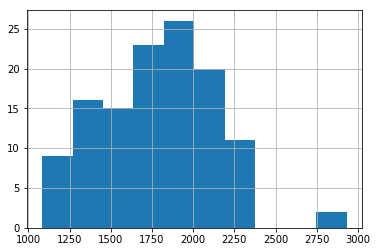

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

# Lengths of reviews by Armchair Interviews
df[df.reviewer_id == 'A21NVBFIEQWDSG'].review_length.hist()

If we leave out those common bigram terms, we get more book-related bigrams:

In [32]:
ignore_list = ['new york', 'york city', 'york times', 'harriet klausner', 'armchair interviews']
bigram_cooc = get_ngram_cooccurrence(spacy_docs, ngram_size=2, use_lemma=True, ignore_list=ignore_list)

for cooc, freq in bigram_cooc.most_common(20):
    bigram1, bigram2 = cooc[0], cooc[1]
    print(f'{bigram1: <40}{bigram2: <40}{freq: <8}')

feel like                               main character                          47      
feel like                               year old                                34      
good friend                             main character                          29      
main character                          year old                                26      
good book                               highly recommend                        26      
feel like                               highly recommend                        26      
look forward                            main character                          24      
feel like                               look forward                            24      
main character                          take place                              23      
highly recommend                        year old                                22      
main character                          story line                              22      
feel like            

In [511]:
num_ngrams = 100
print('spacy docs:', len(spacy_docs))
ngram_sets = [list(set(make_content_ngrams(spacy_doc, ngram_size=2, use_lemma=True))) for spacy_doc in spacy_docs]
ngram_freq = Counter([ngram for ngram_set in ngram_sets for ngram in ngram_set])

for ngram, freq in ngram_freq.most_common(num_ngrams):
    print(f'{ngram: <40}{freq: <8}')
    

spacy docs: 8399
feel like                               504     
main character                          475     
highly recommend                        433     
year ago                                387     
year old                                366     
new york                                362     
look forward                            302     
good book                               295     
good friend                             270     
high school                             244     
take place                              243     
look like                               208     
united states                           194     
writing style                           191     
long time                               189     
great book                              183     
story line                              168     
short story                             151     
great deal                              148     
enjoy read                              146     
yea

In [509]:
num_ngrams = 500
common_ngrams = [ngram for ngram, _freq in ngram_freq.most_common(num_ngrams)]
ngram_cooc = get_cooccurrence(ngram_sets, common_ngrams)


In [519]:
for pair, freq in ngram_cooc.most_common():
    ngram1, ngram2 = pair[0], pair[1]
    if ngram1 == 'writing style' or ngram2 == 'writing style':
        pmi = freq / (ngram_freq[ngram1] * ngram_freq[ngram2])
        if pmi > 0.0004:
            print(ngram1, ngram2, freq, ngram_freq[ngram1], ngram_freq[ngram2], pmi)

bad thing writing style 9 86 191 0.0005479118470717156
enjoyable read writing style 8 73 191 0.0005737646130674891
true love writing style 6 54 191 0.0005817335660267597
good way writing style 6 76 191 0.00041333700744006614
bad book writing style 5 53 191 0.0004939247258717772
good deal writing style 5 22 191 0.0011899095668729176
good work writing style 4 38 191 0.0005511160099200882
page turner writing style 4 45 191 0.0004653868528214078
write story writing style 3 33 191 0.00047596382674916705
beautiful woman writing style 3 27 191 0.0005817335660267597
soon find writing style 3 34 191 0.0004619648906683092
book get writing style 3 38 191 0.00041333700744006614
finally get writing style 3 39 191 0.0004027386226339106
summer read writing style 3 23 191 0.0006829046209879354
come alive writing style 3 38 191 0.00041333700744006614
get away writing style 3 27 191 0.0005817335660267597
harry potter writing style 3 34 191 0.0004619648906683092
page long writing style 3 35 191 0.0004487